<a href="https://colab.research.google.com/github/uditaagarwal31/cse360-lab2/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib




```
# This is formatted as code
```

Part 1: Exercise 5 in Chapter 2

In [ ]:
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [ ]:
def control(t, y):
    # end point, pd = (3,3)
    # u(t) = k(pd - p(t))
    # u(x) = k(3-y[0])
    # u(y) = k(3-y[1])

    k = 8
    ux = k*(3-y[0])
    uy = k*(3-y[1])

    return array([ux, uy])

In [ ]:
tf = 10.
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([1., 2.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

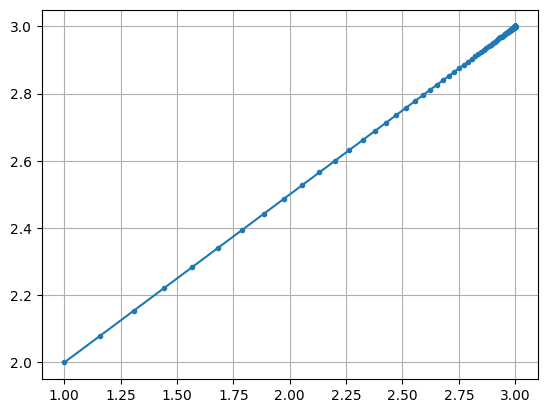

In [ ]:
grid()
plot(x_log[:,0], x_log[:,1], '.-')

Part 1 - Exercise 6 - Chapter 2

In [ ]:
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [ ]:
def control(t, y):
    # u(t) = k(pd - p(t))
    if t <= 3.8: # from (0,0) to (2.8,2.8)
      pd = array([t,t])
    elif t <= 7.5: # from (2.8,2.8) to (3,-2.8)
      pd = array([3,-2.8])
    elif t <= 12:
      pd = array([-2.8,2.8]) # from (3,-2.8) to (-2.8,2.8)
    else:
      pd = array([-3,-3]) # from (-2.8,2.8) to (-3,-3)

    k = 1
    ux = k*(pd[0]-y[0])
    uy = k*(pd[1]-y[1])

    return array([ux, uy])

In [ ]:
tf = 50.
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial [conditions
x = array([0., 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

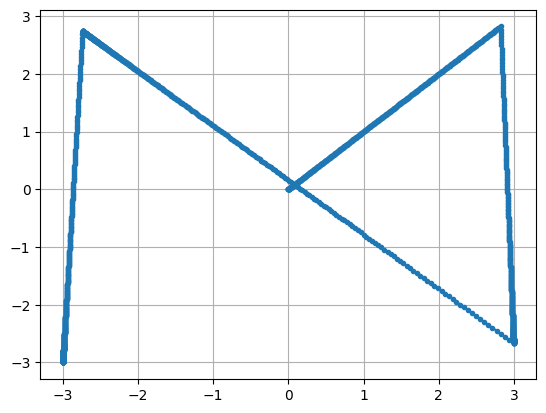

In [ ]:
grid()
plot(x_log[:,0], x_log[:,1], '.-')

Part 2 - Exercise 1 - Stimulating Free Fall

In [ ]:
# Perfect sensor
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u, m=1, g=9.8):
    # Control input affects the acceleration
    dx = array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])

    # Include the gravity in the acceleration in z
    dx[5] += - g

    # Euler integration
    x += Δt * dx

    # Simulate the floor (Plastic collision)
    if x[2] < 0:
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0

    return x

In [ ]:
def control(t, y):
    ux = 0
    uy = 0
    uz = 0
    return [ux, uy, uz]

In [ ]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 9.8, 0.,0.,0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

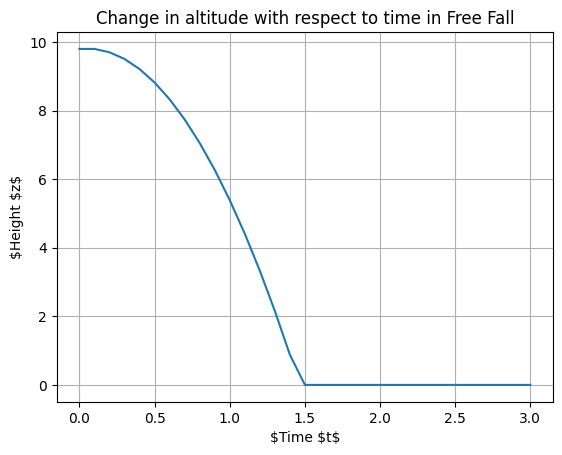

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time in Free Fall", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()




```
# This is formatted as code
```

Exercise 1 of Chapter 3 - Adding Buoyancy

In [ ]:
# Perfect sensor
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u, m=1, g=9.8):
    # Control input affects the acceleration
    dx = array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])

    # Include the gravity in the acceleration in z and add buoyancy force of 9
    dx[5] += - g + 9
    # Euler integration
    x += Δt * dx

    # Simulate the floor (Plastic collision)
    if x[2] < 0:
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0

    return x

In [ ]:
def control(t, y):
    ux = 0
    uy = 0
    uz = 0
    return [ux, uy, uz]

In [ ]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10, 0.,0.,0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

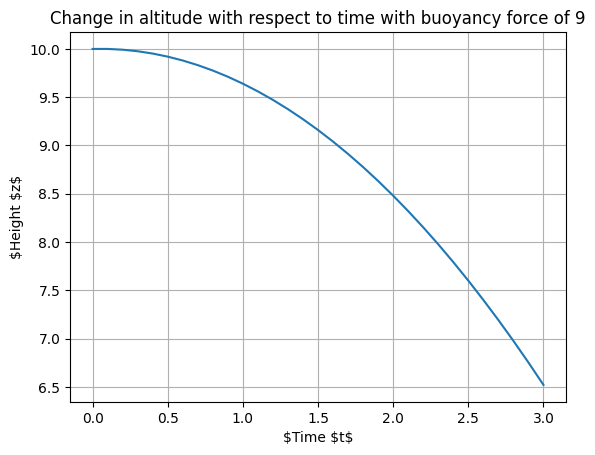

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time with buoyancy force of 9", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()


Part 2 - Exercise 2 of chapter 2 - PD Controller

In [ ]:
# Perfect sensor
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u, m=1, g=9.8):
    # Control input affects the acceleration
    dx = array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])

    # Include the gravity in the acceleration in z
    dx[5] += - g

    # Euler integration
    x += Δt * dx

    # Simulate the floor (Plastic collision)
    if x[2] < 0:
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0

    return x

In [ ]:
def control(t, y):
    # p = [0,0,10]
    # pd = [0,0,15]
    # u = kp(zd-z) + kd(zd-zd) +m*g

    k = 4.5
    kd = 4.5
    ux = 0
    uy = 0
    uz = k*(15-y[2]) + kd * (0-y[5]) + 1*9.8
    return [ux, uy, uz]

In [ ]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10, 0.,0.,15.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

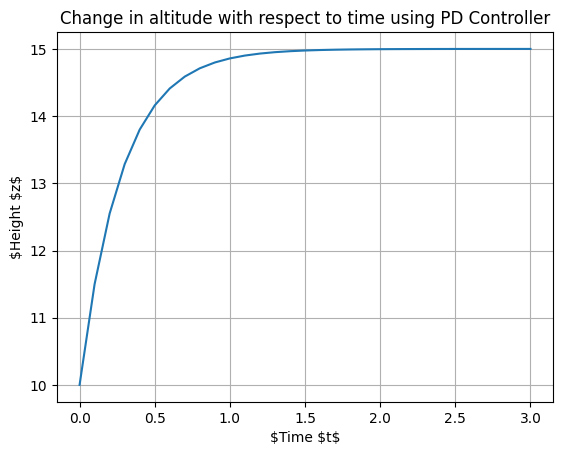

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time using PD Controller", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()


Part 2 - Exercise 3 of chapter 3 - PD Controller

In [ ]:
# Perfect sensor
def sense(x):
    return x

In [ ]:
def simulate(Δt, x, u, m=0.8, g=9.8):
    # Control input affects the acceleration
    dx = array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])

    # Include the gravity in the acceleration in z
    dx[5] += - g

    # Euler integration
    x += Δt * dx

    # Simulate the floor (Plastic collision)
    if x[2] < 0:
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0

    return x

In [ ]:
def control(t, y):
    # p = [0,0,10]
    # pd = [0,0,15]
    # u = kp(zd-z) + kd(zd-zd) +m*g

    k = 6
    kd = 6
    ux = 0
    uy = 0
    uz = k*(15-y[2]) + kd * (0-y[5]) + 1*9.8
    return [ux, uy, uz]

In [ ]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0., 10, 0.,0.,15.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))

x_log = array(x_log)

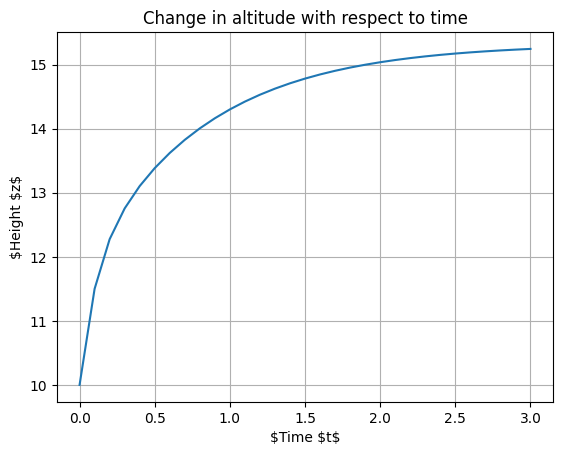

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()
